In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acled-data/acled_data.csv


In [41]:
import requests
import csv

# Replace with your ACLED email and access key
email = 'brandon_concepcion@berkeley.edu'
access_key = 'Xo*LsNEYD*gXG7WrW3fl'

# Define the API endpoint and parameters
url = 'https://api.acleddata.com/acled/read'
params = {
    'email': email,
    'key': access_key,
    'limit': 100000,  # Number of records to fetch
    'format': 'json',  # Response format
    #'country': 'Iran'
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json().get("data", [])
    
    # Define the CSV file name
    csv_file = "acled_data.csv"

    # Open a CSV file to write data
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Write the header row
        if data:
            writer.writerow(data[0].keys())  # Use the keys from the first record as headers
        
        # Write the data rows
        for record in data:
            writer.writerow(record.values())
    
    print(f"Data successfully saved to {csv_file}")
else:
    print(f"Error: {response.status_code} - {response.text}")

Data successfully saved to acled_data.csv


In [42]:
data = pd.read_csv('acled_data.csv')
data

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,BFO12795,2024-11-08,2024,1,Political violence,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Bane,11.5756,-0.3566,1,Facebook,New media,"On 8 November 2024, JNIM militants attacked th...",2,NaN,1731368104
1,BFO12802,2024-11-08,2024,1,Strategic developments,Strategic developments,Other,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Silmangue,13.8886,-0.6095,1,Facebook; Undisclosed Source,Local partner-Other,"Other: On 8 November 2024, JNIM militants cond...",0,NaN,1731368104
2,BFO12804,2024-11-08,2024,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Gorgadji,14.0329,-0.5197,1,Undisclosed Source,Local partner-Other,"On 8 November 2024, JNIM militants attacked a ...",0,NaN,1731368104
3,BOL6732,2024-11-08,2024,1,Political violence,Riots,Mob violence,Rioters (Bolivia),MAS-IPSP: Movement for Socialism-Political Ins...,Rioters,...,La Paz,-16.4957,-68.1336,1,Correo del Sur; El Deber; La Patria en Linea; ...,Subnational-National,"On 8 November 2024, in La Paz (La Paz), a grou...",0,crowd size=no report,1731368105
4,BOL6733,2024-11-08,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Bolivia),Teachers (Bolivia); CTEUB: Confederation of Ur...,Protesters,...,La Paz,-16.4957,-68.1336,1,El Diario (Bolivia),National,"On 8 November 2024, in La Paz (La Paz), a grou...",0,crowd size=no report,1731368105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,UKR169722,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Ivano-Darivka,48.8138,38.1948,2,Ministry of Defence of Ukraine,Other,"On 6 August 2024, Russian and Ukrainian forces...",0,NaN,1723576793
99996,UKR169723,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Chasiv Yar,48.5869,37.8324,2,Ministry of Defence of Russia; Ministry of Def...,Other-National,"On 6 August 2024, Russian and Ukrainian forces...",4,NaN,1723576793
99997,UKR169724,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,Ivanivske,48.5722,37.9174,2,Ministry of Defence of Ukraine,Other,"On 6 August 2024, Russian and Ukrainian forces...",0,NaN,1723576793
99998,UKR169725,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,New York,48.3319,37.8358,1,Ministry of Defence of Ukraine; Unian,Other-National,"On 6 August 2024, Russian and Ukrainian forces...",0,NaN,1723576793


In [43]:
data.value_counts('inter1')

inter1
Protesters               35807
External/Other forces    29473
State forces             12581
Political militia        10449
Rebel group               5432
Rioters                   4527
Identity militia          1401
Civilians                  330
Name: count, dtype: int64

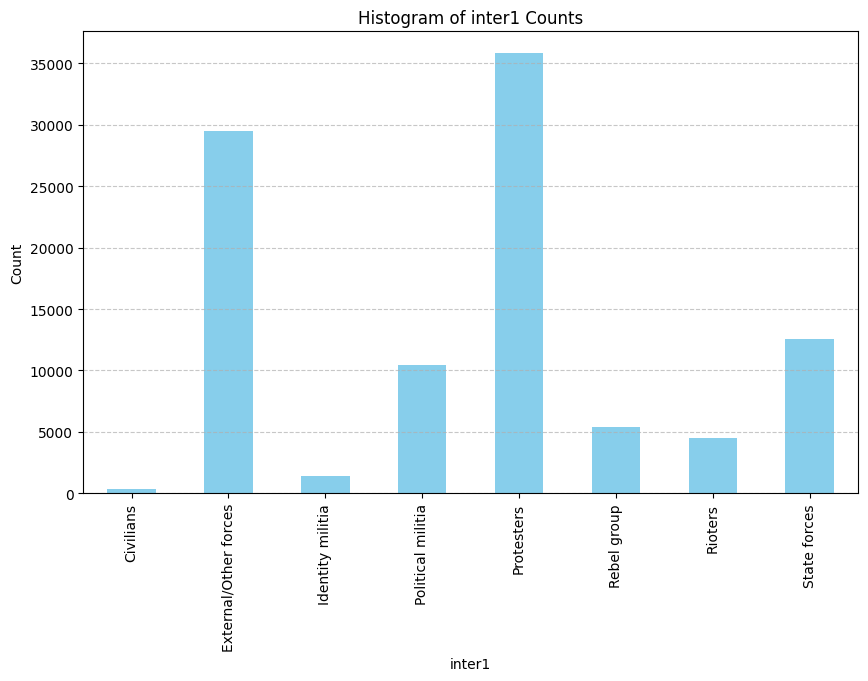

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
data['inter1'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Histogram of inter1 Counts')
plt.xlabel('inter1')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
def count_all_numbers(text):
    if not isinstance(text, str):  # Ensure the input is a string
        return 0

    # Define patterns for digits and spelled-out numbers
    digit_pattern = r'\b\d+\b'
    word_pattern = r'\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|' \
                   r'eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|' \
                   r'eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|' \
                   r'eighty|ninety|hundred|thousand|million|billion)\b'

    # Combine both patterns into one
    combined_pattern = f"{digit_pattern}|{word_pattern}"
    
    # Find all matches in the text
    matches = re.findall(combined_pattern, text, flags=re.IGNORECASE)
    
    return len(matches)

data['the_count'] = data['notes'].apply(count_all_numbers)

# Display the resulting DataFrame
print(data[['notes', 'the_count']].head())

                                               notes  the_count
0  On 8 November 2024, JNIM militants attacked th...          4
1  Other: On 8 November 2024, JNIM militants cond...          2
2  On 8 November 2024, JNIM militants attacked a ...          2
3  On 8 November 2024, in La Paz (La Paz), a grou...          3
4  On 8 November 2024, in La Paz (La Paz), a grou...          2


In [55]:
data

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,injury_count,the_count
0,BFO12795,2024-11-08,2024,1,Political violence,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,-0.3566,1,Facebook,New media,"On 8 November 2024, JNIM militants attacked th...",2,NaN,1731368104,0,4
1,BFO12802,2024-11-08,2024,1,Strategic developments,Strategic developments,Other,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,-0.6095,1,Facebook; Undisclosed Source,Local partner-Other,"Other: On 8 November 2024, JNIM militants cond...",0,NaN,1731368104,0,2
2,BFO12804,2024-11-08,2024,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,-0.5197,1,Undisclosed Source,Local partner-Other,"On 8 November 2024, JNIM militants attacked a ...",0,NaN,1731368104,0,2
3,BOL6732,2024-11-08,2024,1,Political violence,Riots,Mob violence,Rioters (Bolivia),MAS-IPSP: Movement for Socialism-Political Ins...,Rioters,...,-68.1336,1,Correo del Sur; El Deber; La Patria en Linea; ...,Subnational-National,"On 8 November 2024, in La Paz (La Paz), a grou...",0,crowd size=no report,1731368105,0,3
4,BOL6733,2024-11-08,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Bolivia),Teachers (Bolivia); CTEUB: Confederation of Ur...,Protesters,...,-68.1336,1,El Diario (Bolivia),National,"On 8 November 2024, in La Paz (La Paz), a grou...",0,crowd size=no report,1731368105,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,UKR169722,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,38.1948,2,Ministry of Defence of Ukraine,Other,"On 6 August 2024, Russian and Ukrainian forces...",0,NaN,1723576793,0,2
99996,UKR169723,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,37.8324,2,Ministry of Defence of Russia; Ministry of Def...,Other-National,"On 6 August 2024, Russian and Ukrainian forces...",4,NaN,1723576793,620,7
99997,UKR169724,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,37.9174,2,Ministry of Defence of Ukraine,Other,"On 6 August 2024, Russian and Ukrainian forces...",0,NaN,1723576793,0,2
99998,UKR169725,2024-08-06,2024,1,Political violence,Battles,Armed clash,Military Forces of Russia (2000-),NaN,External/Other forces,...,37.8358,1,Ministry of Defence of Ukraine; Unian,Other-National,"On 6 August 2024, Russian and Ukrainian forces...",0,NaN,1723576793,0,2


In [56]:
data.value_counts('the_count')

the_count
2     52675
3     20686
4     10610
5      4463
7      3734
6      2564
8      1956
9       993
10      729
11      481
12      362
13      280
14      106
16       76
15       68
18       39
17       38
20       28
19       24
22       23
21       20
25        9
34        6
23        5
27        4
24        4
30        2
37        2
32        2
28        2
26        2
29        1
33        1
36        1
39        1
40        1
41        1
50        1
Name: count, dtype: int64

In [57]:
data['notes'][9082]

'On 30 October 2024, residents of Donja Jablanica blocked the M-17 highway in protest, expressing their dissatisfaction with the current state of infrastructure in their village. This protest followed the devastating consequences of a recent flood, which was exacerbated by a nearby illegal quarry that collapsed under the rush of water. The residents demanded that local authorities conduct a safety assessment and address the housing issues faced by those affected by the floods.'

In [58]:
words = ['violence', 'violent', 'beaten','attacked','attack', 'tear gas', 'massacre']

In [59]:

# Function to count occurrences of each word in the 'notes' column
def count_word_occurrences(data, column, words):
    word_counts = {}
    for word in words:
        word_counts[word] = data[column].str.contains(fr'\b{word}\b', case=False, na=False).sum()
    return word_counts

# Apply the function to the 'notes' column
word_counts = count_word_occurrences(data, 'notes', words)

# Display results
for word, count in word_counts.items():
    print(f"'{word}' found in {count} rows")

'violence' found in 3689 rows
'violent' found in 471 rows
'beaten' found in 140 rows
'attacked' found in 3440 rows
'attack' found in 4027 rows
'tear gas' found in 961 rows
'massacre' found in 40 rows


In [60]:
1200/28000

0.04285714285714286

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Define a list of additional stopwords (e.g., months)
additional_stopwords = [
    'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 
    'september', 'october', 'november', 'december'
]

# Combine NLTK stopwords and additional stopwords
stop_words = set(stopwords.words('english')) | set(additional_stopwords)

# Function to clean and tokenize text
def clean_and_tokenize(text):
    if not isinstance(text, str):
        return []
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Split into words
    return [word for word in words if word not in stop_words]  # Remove stopwords

# Tokenize and clean all notes
all_words = data['notes'].dropna().apply(clean_and_tokenize).sum()

# Count the 50 most common words
word_counts = Counter(all_words).most_common(100)

# Convert to DataFrame for easier plotting
word_counts_df = pd.DataFrame(word_counts, columns=['word', 'count'])

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(word_counts_df['word'], word_counts_df['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words in Notes')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
escalation_words = ['Assault','Brutality','Clash','Combat','Conflict',
'Confrontation','Harassment','Hostility','Fighting','Brawl','Skirmish',
'Riot','Melee','Beating','Lynching','Torture','Killing','Murder',
'Stabbing','Shooting','Striking','Bombing','Gunfire','Explosion','Shelling',
'Airstrike','Drone strike','Missile','Gunfight','Incendiary','Artillery',
'Firebomb','Arson','Rebellion','Mutiny','Uprising','Insurrection','Coup',
'Revolution','Looting','Terror','Panic','Genocide','Ethnic cleansing',
'Slaughter','Carnage','Bloodshed','Annihilation','Atrocity','Execution',
'Decimation','Extermination','Tear gas','Rubber bullets','Batons',
'Barricade','Water cannon','Crowd control','Crackdown','Suppression',
'Force','Militia','Guerilla','Paramilitary','Insurgent','Terrorist',
'Extremist','Rebel','Mercenary','Combatant','Perpetrator','Destruction',
'Devastation','Casualties','Fatalities','Bloodbath','Scorched earth',
'Evacuation','Displacement','Chaos', 
'violence', 'violent', 'beaten','attacked','attack', 'tear gas', 'massacre']

In [ ]:

# Function to count the number of escalation words in a row
def count_escalation_words(text, escalation_words):
    if not isinstance(text, str):
        return 0
    # Create a case-insensitive search for each word
    return sum(text.lower().count(word.lower()) for word in escalation_words)

# Apply the function to the 'notes' column
data['escalation_count'] = data['notes'].apply(lambda x: count_escalation_words(x, escalation_words))

# Display the updated DataFrame
print(data[['notes', 'escalation_count']].head())

In [ ]:
data

In [ ]:
data.value_counts('escalation_count')

In [ ]:
civilian_words = ['civilian', 'civilians']
def count_escalation_words(text, escalation_words):
    if not isinstance(text, str):
        return 0
    # Create a case-insensitive search for each word
    return sum(text.lower().count(word.lower()) for word in escalation_words)

# Apply the function to the 'notes' column
data['civilian_count'] = data['notes'].apply(lambda x: count_escalation_words(x, civilian_words))

# Display the updated DataFrame
print(data[['notes', 'civilian_count']].head())

In [ ]:
data.value_counts('civilian_count')

In [ ]:
data['civvy'] = ((data['inter1'] == 'Civilians') | (data['inter2'] == 'Civilians')).astype(int)

In [ ]:
data.value_counts('civilian_targeting')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Correlation between 'var1' and 'var2'
binary_corr = data[['civvy', 'civilian_targeting_encoded']].corr()

# Plot a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(binary_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap between Binary Variables')
plt.show()

# **SEAN USE CODE BELOW THIS**

In [ ]:
data['civilian_targeting_encoded'] = data['civilian_targeting'].notnull().astype(int)

In [ ]:
data['danger'] = (3 * data['civilian_targeting_encoded'] + 1) * (data['fatalities'] + 1)

In [ ]:
def map_danger(value):
    if value == 1:
        return 0
    elif 2 <= value <= 7:
        return 1
    elif value >= 8:
        return 2
    return value  # Handle unexpected cases (optional)

# Apply the mapping to the 'danger' column
data['danger'] = data['danger'].apply(map_danger)

In [ ]:
data['danger'].value_counts().plot(kind='bar')

# Customizing the plot
plt.title("Counts of 'danger' Variable")
plt.xlabel("Danger Levels")
plt.ylabel("Count")
plt.show()